# week0_10: PyTorch practice, hints and Dataloaders

Credits:
* First part is based on YSDA [Practical RL course week04 materials](https://github.com/yandexdataschool/Practical_RL/tree/master/week04_%5Brecap%5D_deep_learning).
* Second part is based on PyTorch official tutorials and [this kaggle kernel](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader)
* Third part is based on PyTorch tutorial by [Stanford CS 231n course](http://cs231n.stanford.edu)

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

__This notebook__ will teach you to use pytorch low-level core. You can install it [here](http://pytorch.org/).

__Pytorch feels__ differently than other frameworks (like tensorflow/theano) on almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

Let's dive into it!

In [1]:
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import transforms

### Task 1: Tensormancy

__1.1 The [_disclaimer_](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)__

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (6 \cdot \theta) ) \cdot (1 + 0.01 \cdot cos(24 \cdot \theta)) \cdot (0.5 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (10 + sin(10 \cdot \theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

In [ ]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = None  # YOUR CODE HERE

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = None  # YOUR CODE HERE
y = None  # YOUR CODE HERE


plt.figure(figsize=(6, 6))
plt.fill(x.numpy(), y.numpy(), color="red")
plt.grid()

### Task 2: Using the Dataloader

In [2]:
from torch import nn
from torch.nn import functional as F

In [3]:
# !wget https://raw.githubusercontent.com/neychev/harbour_ml2020/master/day10_Optimization_and_regularization_in_DL/notmnist.py

In [4]:
from notmnist import load_notmnist

In [5]:
X_train, y_train, X_test, y_test = load_notmnist()

Extracting ...
Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


In [8]:
class DatasetMNIST(Dataset):
    def __init__(self, path="./notMNIST_small", letters="ABCDEFGHIJ", transform=None):
        self.data, self.labels, _, _ = load_notmnist(path=path, letters=letters, test_size=0.25)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        image = self.data[index].transpose(1, 2, 0)
        label = self.labels[index]

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [9]:
full_dataset = DatasetMNIST("./notMNIST_small", "AB", transform=None)

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [10]:
# we can access and get data with index by __getitem__(index)
img, lab = full_dataset.__getitem__(0)

print(img.shape)
print(type(img))

(28, 28, 1)
<class 'numpy.ndarray'>


In [11]:
a = torchvision.transforms.ToTensor()

a(img).shape

torch.Size([1, 28, 28])

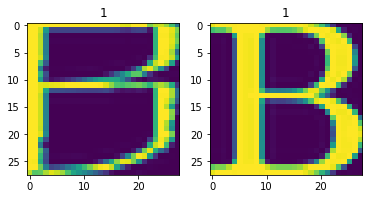

In [17]:
inds = np.random.randint(len(full_dataset), size=2)

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(full_dataset[inds[i]][0].reshape([28, 28]))
    plt.title(str(full_dataset[inds[i]][1]))

#### To the DataLoader

In [19]:
train_loader = DataLoader(full_dataset, batch_size=8, shuffle=True)

We can use dataloader as iterator by using iter() function.

In [20]:
train_iter = iter(train_loader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>


We can look at images and labels of batch size by extracting data `.next()` method.

In [21]:
images, labels = train_iter.next()

print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

images shape on batch size = torch.Size([8, 28, 28, 1])
labels shape on batch size = torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/Caskroom/miniconda/base/envs/ml-mipt/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


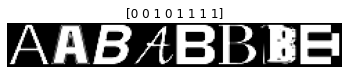

In [22]:
# make grid takes tensor as arg
# tensor : (batchsize, channels, height, width)
grid = torchvision.utils.make_grid(images.permute([0, 3, 1, 2]))

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis("off")
plt.title(labels.numpy());

And now with transformations:

In [23]:
train_dataset_with_transform = DatasetMNIST(transform=torchvision.transforms.ToTensor())

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


In [24]:
img, lab = train_dataset_with_transform.__getitem__(0)

print("image shape at the first row : {}".format(img.size()))

image shape at the first row : torch.Size([1, 28, 28])


In [25]:
train_loader_tr = DataLoader(train_dataset_with_transform, batch_size=8, shuffle=True)

train_iter_tr = iter(train_loader_tr)
print(type(train_iter_tr))

images, labels = train_iter_tr.next()

print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


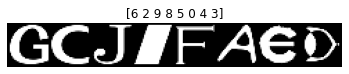

In [26]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis("off")
plt.title(labels.numpy());

### Composing several transformations

If you want to take data augmentation, you have to make List using `torchvision.transforms.Compose`

```
class Compose(object):
    """Composes several transforms together.
    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.
    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

    def __repr__(self):
        format_string = self.__class__.__name__ + '('
        for t in self.transforms:
            format_string += '\n'
            format_string += '    {0}'.format(t)
        format_string += '\n)'
        return format_string
```


this function can convert some image by order within `__call__` method.

In [30]:
class Flatten:
    def __init__(self, params):
        self.params = params

    def __call__(self, pic):
        return pic.flatten(self.params)

    def __repr__(self):
        return self.__class__.__name__ + "()"

In [33]:
a = Flatten()

In [34]:
a(img).shape

torch.Size([784])

In [35]:
new_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        Flatten(),
    ]
)

# Putting all together

In [36]:
import time

from IPython.display import clear_output

In [37]:
# use GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [41]:
def subset_ind(dataset, ratio: float):
    return torch.randint(len(dataset), (int(len(dataset) * ratio),))  # YOUR CODE HERE

In [42]:
dataset = DatasetMNIST(
    "./notMNIST_small",
    #   "AB",
    transform=new_transform,
)

shrink_inds = subset_ind(dataset, 0.2)
dataset = Subset(dataset, shrink_inds)

print(f"\n\n dataset size: {len(dataset)}, labels: {np.unique(dataset.dataset.labels)}")

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


 dataset size: 2808, labels: [0 1 2 3 4 5 6 7 8 9]


In [43]:
val_size = 0.2
val_inds = subset_ind(dataset, val_size)

train_dataset = Subset(dataset, [i for i in range(len(dataset)) if i not in val_inds])
val_dataset = Subset(dataset, val_inds)

print(f"  training size: {len(train_dataset)}\nvalidation size: {len(val_dataset)}")

  training size: 2292
validation size: 561


In [44]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [45]:
train_iter = iter(train_loader)
print(type(train_iter))

images, labels = train_iter.next()

print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([32, 784])
labels shape on batch size = torch.Size([32])


In [46]:
loss_func = nn.CrossEntropyLoss()

In [47]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 10),
    nn.Sigmoid(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int):
    train_loss = []
    val_loss = []
    val_accuracy = []

    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True)  # enable dropout / batch_norm training behavior
        for X_batch, y_batch in train_loader:
            # move data to target device
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads

            # forward pass, predict target with model
            preds = model(X_batch)

            # compute loss
            loss = loss_fn(preds, y_batch)

            # backward pass, compute gradients
            loss.backward()

            # potimization step - train model weights
            opt.step()

            # clear gradients
            opt.zero_grad()

            ep_train_loss.append(loss.item())

        model.train(False)  # disable dropout / use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # move data to target device
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                # compute predictions
                preds = model(X_batch)
                loss = loss_fn(preds, y_batch)

                ep_val_loss.append(loss)  # YOUR CODE HERE
                y_pred = preds.argmax(dim=1)  # YOUR CODE HERE
                ep_val_accuracy.append(accuracy_score(y_batch, y_pred))  # YOUR CODE HERE)

        # print the results for this epoch:
        print(f"Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s")

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return train_loss, val_loss, val_accuracy

In [64]:
n_epochs = 100

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, val_loader, loss_func, opt, n_epochs
)

Epoch 1 of 100 took 0.098s
	  training loss: 1.550566
	validation loss: 1.614021
	validation accuracy: 0.845
Epoch 2 of 100 took 0.097s
	  training loss: 1.549042
	validation loss: 1.609073
	validation accuracy: 0.854
Epoch 3 of 100 took 0.090s
	  training loss: 1.547985
	validation loss: 1.607701
	validation accuracy: 0.855
Epoch 4 of 100 took 0.098s
	  training loss: 1.546953
	validation loss: 1.610052
	validation accuracy: 0.852
Epoch 5 of 100 took 0.098s
	  training loss: 1.545932
	validation loss: 1.605459
	validation accuracy: 0.858
Epoch 6 of 100 took 0.091s
	  training loss: 1.545011
	validation loss: 1.608110
	validation accuracy: 0.858
Epoch 7 of 100 took 0.095s
	  training loss: 1.544070
	validation loss: 1.611062
	validation accuracy: 0.849
Epoch 8 of 100 took 0.093s
	  training loss: 1.542841
	validation loss: 1.609696
	validation accuracy: 0.850
Epoch 9 of 100 took 0.090s
	  training loss: 1.542077
	validation loss: 1.605458
	validation accuracy: 0.855
Epoch 10 of 100 too

Epoch 76 of 100 took 0.095s
	  training loss: 1.511581
	validation loss: 1.606916
	validation accuracy: 0.855
Epoch 77 of 100 took 0.092s
	  training loss: 1.510828
	validation loss: 1.606083
	validation accuracy: 0.850
Epoch 78 of 100 took 0.091s
	  training loss: 1.510742
	validation loss: 1.607999
	validation accuracy: 0.855
Epoch 79 of 100 took 0.096s
	  training loss: 1.510233
	validation loss: 1.605982
	validation accuracy: 0.850
Epoch 80 of 100 took 0.091s
	  training loss: 1.510512
	validation loss: 1.608139
	validation accuracy: 0.849
Epoch 81 of 100 took 0.091s
	  training loss: 1.509687
	validation loss: 1.606493
	validation accuracy: 0.853
Epoch 82 of 100 took 0.093s
	  training loss: 1.509783
	validation loss: 1.607308
	validation accuracy: 0.852
Epoch 83 of 100 took 0.092s
	  training loss: 1.509219
	validation loss: 1.608066
	validation accuracy: 0.855
Epoch 84 of 100 took 0.089s
	  training loss: 1.508959
	validation loss: 1.607883
	validation accuracy: 0.853
Epoch 85 o

In [65]:
def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title("Loss")
    axes[0].plot(train_loss, label="train")
    axes[0].plot(val_loss, label="validation")
    axes[0].grid()
    axes[0].legend()

    axes[1].set_title("Validation accuracy")
    axes[1].grid()
    axes[1].plot(val_accuracy)

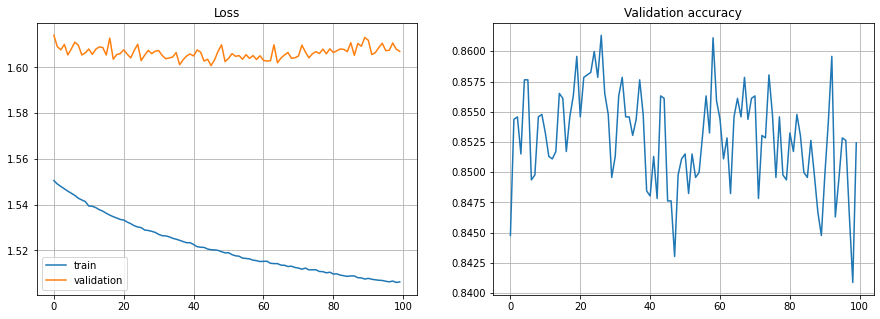

In [66]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Real network

In [71]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    #     nn.Dropout(),
    nn.Linear(200, 10),
    nn.Sigmoid(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [72]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, val_loader, loss_func, opt, n_epochs
)

Epoch 1 of 30 took 0.311s
	  training loss: 1.734259
	validation loss: 1.631335
	validation accuracy: 0.830
Epoch 2 of 30 took 0.310s
	  training loss: 1.591984
	validation loss: 1.599045
	validation accuracy: 0.865
Epoch 3 of 30 took 0.299s
	  training loss: 1.551076
	validation loss: 1.582624
	validation accuracy: 0.870
Epoch 4 of 30 took 0.316s
	  training loss: 1.531351
	validation loss: 1.572198
	validation accuracy: 0.891
Epoch 5 of 30 took 0.313s
	  training loss: 1.521927
	validation loss: 1.569492
	validation accuracy: 0.889
Epoch 6 of 30 took 0.354s
	  training loss: 1.517626
	validation loss: 1.577885
	validation accuracy: 0.874
Epoch 7 of 30 took 0.324s
	  training loss: 1.510266
	validation loss: 1.571264
	validation accuracy: 0.889
Epoch 8 of 30 took 0.359s
	  training loss: 1.504642
	validation loss: 1.576469
	validation accuracy: 0.881
Epoch 9 of 30 took 0.377s
	  training loss: 1.501517
	validation loss: 1.574189
	validation accuracy: 0.888
Epoch 10 of 30 took 0.335s
	

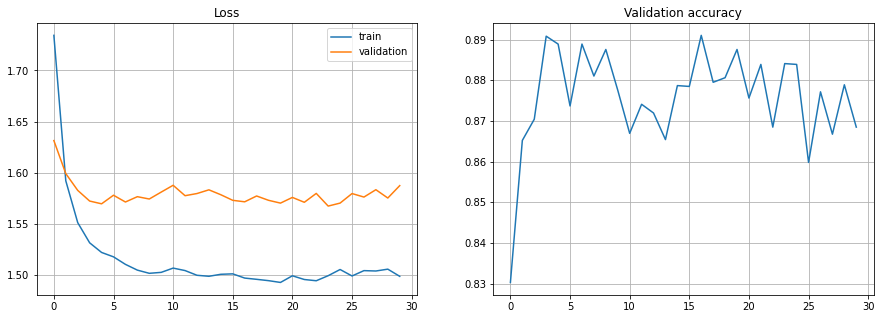

In [73]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Overfit!!!

In [79]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 600),
    nn.ReLU(),
    nn.Linear(600, 500),
    nn.ReLU(),
    nn.Linear(500, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
    nn.Sigmoid(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-4)

In [80]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, val_loader, loss_func, opt, n_epochs
)

Epoch 1 of 30 took 0.681s
	  training loss: 2.143313
	validation loss: 1.810770
	validation accuracy: 0.689
Epoch 2 of 30 took 0.665s
	  training loss: 1.699320
	validation loss: 1.653433
	validation accuracy: 0.677
Epoch 3 of 30 took 0.650s
	  training loss: 1.628803
	validation loss: 1.627719
	validation accuracy: 0.682
Epoch 4 of 30 took 0.648s
	  training loss: 1.601442
	validation loss: 1.614173
	validation accuracy: 0.693
Epoch 5 of 30 took 0.659s
	  training loss: 1.584005
	validation loss: 1.608448
	validation accuracy: 0.694
Epoch 6 of 30 took 0.656s
	  training loss: 1.572771
	validation loss: 1.603624
	validation accuracy: 0.692
Epoch 7 of 30 took 0.671s
	  training loss: 1.562056
	validation loss: 1.597327
	validation accuracy: 0.730
Epoch 8 of 30 took 0.673s
	  training loss: 1.557009
	validation loss: 1.599820
	validation accuracy: 0.744
Epoch 9 of 30 took 0.664s
	  training loss: 1.549231
	validation loss: 1.599348
	validation accuracy: 0.737
Epoch 10 of 30 took 0.690s
	

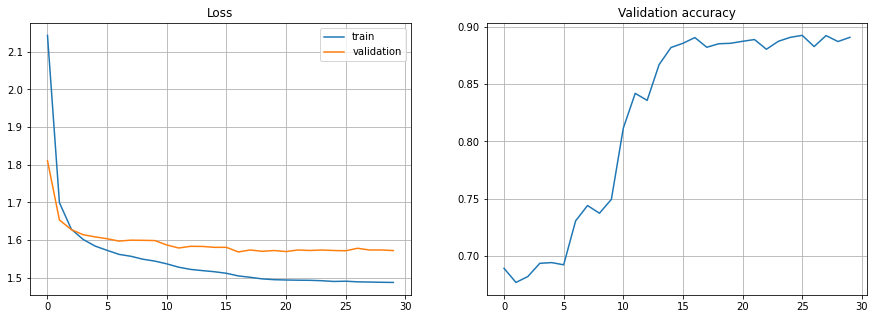

In [81]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Your turn
Try to add some additional transformations (e.g. random crop, rotation etc.) and train your model!

### Dropout try

### Batchnorm try

### 3. Save the model (model checkpointing)

Now we have trained a model! Obviously we do not want to retrain the model everytime we want to use it. Plus if you are training a super big model, you probably want to save checkpoint periodically so that you can always fall back to the last checkpoint in case something bad happened or you simply want to test models at different training iterations.

Model checkpointing is fairly simple in PyTorch. First, we define a helper function that can save a model to the disk

In [ ]:
def save_checkpoint(checkpoint_path, model, optimizer):
    # state_dict: a Python dictionary object that:
    # - for a model, maps each layer to its parameter tensor;
    # - for an optimizer, contains info about the optimizer’s states and hyperparameters used.
    state = {"state_dict": model.state_dict(), "optimizer": optimizer.state_dict()}
    torch.save(state, checkpoint_path)
    print("model saved to %s" % checkpoint_path)


def load_checkpoint(checkpoint_path, model, optimizer):
    state = torch.load(checkpoint_path)
    model.load_state_dict(state["state_dict"])
    optimizer.load_state_dict(state["optimizer"])
    print("model loaded from %s" % checkpoint_path)

In [ ]:
# create a brand new model
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# Testing -- you should get a pretty poor performance since the model hasn't learned anything yet.
test()

#### Define a training loop with model checkpointing

In [ ]:
def train_save(epoch, save_interval, log_interval=100):
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        for batch_idx, (data, target) in enumerate(trainset_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            if iteration % log_interval == 0:
                print(
                    "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                        ep,
                        batch_idx * len(data),
                        len(trainset_loader.dataset),
                        100.0 * batch_idx / len(trainset_loader),
                        loss.item(),
                    )
                )
            # different from before: saving model checkpoints
            if iteration % save_interval == 0 and iteration > 0:
                save_checkpoint("mnist-%i.pth" % iteration, model, optimizer)
            iteration += 1
        test()

    # save the final model
    save_checkpoint("mnist-%i.pth" % iteration, model, optimizer)

In [ ]:
train_save(5, save_interval=500, log_interval=100)

In [ ]:
# create a new model
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# load from the final checkpoint
load_checkpoint("mnist-4690.pth", model, optimizer)
# should give you the final model accuracy
test()

### More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)